In [1]:
from WNQuery import *

In [2]:
warnings_file = open('warnings.txt','w')
wnquery = WNQuery("plwordnet_3_1/plwordnet-3.1-visdisc.xml", log=warnings_file)

In [3]:
import sys
wnquery.writeStats(sys.stdout)

PoS		#synsets	#word senses	#words
Nouns		132398		176779		134778
Verbs		27693		38564		19595
Adjectives	11256		14035		8006
Adverbs		0		0		0


In [4]:
# Znajdź wszystkie znaczenia rzeczownika szkoda oraz wymień ich synonimy (jeśli posiadają).
meanings = wnquery.lookUpLiteral('szkoda', 'n')
for meaning in meanings:
    print(meaning.toString())

PLWN-00003675-n  {strata:1, utrata:1, szkoda:2, uszczerbek:1}  ()
PLWN-00006533-n  {szkoda:1}  (brak danych)


PLWN-00410902-n  {wypadek drogowy:1}  ()
PLWN-00410901-n  {wypadek komunikacyjny:1}  ()
PLWN-00003982-n  {wypadek:1}  ()
PLWN-00027419-n  {zdarzenie oceniane negatywnie:1}  (brak danych)
PLWN-00006526-n  {wydarzenie:1, wypadek:3, zdarzenie:2, historia:3}  ()


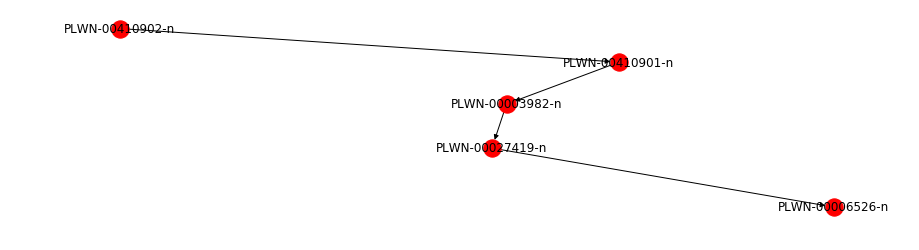

In [5]:
# Znajdź domknięcie przechodnie relacji hiperonimi dla pierwszego znaczenia wyrażenia wypadek drogowy 
# i przedstaw je w postaci grafu skierowanego.
meaning = wnquery.lookUpSense('wypadek drogowy', 1, 'n')
graph = []

def traceRelation(wnquery, wnid, pos, rel):
    res = []
    ids = wnquery.lookUpRelation(wnid, pos, rel)
    res.append(wnid)
    print(wnquery.getSynset(wnid, 'n').toString())
    for i in ids:  
        graph.append((wnid, i))
        res.extend(traceRelation(wnquery, i, pos, rel))
    return res

traceRelation(wnquery, meaning.wnid, 'n', 'hypernym')

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.DiGraph()
G.add_edges_from(graph)
plt.figure(figsize=(12,3)) 
nx.draw_spring(G, with_labels = True)
plt.show()

In [6]:
# Znajdź bezpośrednie hiponimy rzeczownika wypadek1.
meaning = wnquery.lookUpSense('wypadek', 1, 'n')
relation = wnquery.lookUpRelation(meaning.wnid, meaning.pos, 'hyponym')
for meaning in relation:
    print(wnquery.getSynset(meaning, 'n').toString())

PLWN-00001284-n  {zderzenie:2, kraksa:1}  ()
PLWN-00006486-n  {kolizja:2}  ()
PLWN-00016131-n  {karambol:1}  ()
PLWN-00034688-n  {zawał:2}  ()
PLWN-00034689-n  {tąpnięcie:1}  ()
PLWN-00241026-n  {kapotaż:1}  ()
PLWN-00258639-n  {wykolejenie:2}  ()
PLWN-00389170-n  {zakrztuszenie:1, zachłyśnięcie:1, aspiracja:3}  ()
PLWN-00410901-n  {wypadek komunikacyjny:1}  ()
PLWN-00411618-n  {katastrofa budowlana:1}  ()
PLWN-00436137-n  {wypadek jądrowy:1}  ()


In [7]:
# Znajdź hiponimy drugiego rzędu dla rzeczownika wypadek1.
meaning = wnquery.lookUpSense('wypadek', 1, 'n')
relation = wnquery.lookUpRelation(meaning.wnid, meaning.pos, 'hyponym')
for meaning in relation:
    synset = wnquery.getSynset(meaning, 'n')
    relations = wnquery.lookUpRelation(synset.wnid, synset.pos, 'hyponym')
    for rel in relations:
        print(wnquery.getSynset(rel, 'n').toString())

PLWN-00235346-n  {czołówka:9, zderzenie czołowe:1}  ()
PLWN-00471555-n  {stłuczka:1}  ()
PLWN-00441365-n  {kolizja drogowa:1}  ()
PLWN-00037295-n  {obwał:1}  ()
PLWN-00410902-n  {wypadek drogowy:1}  ()


In [8]:
# Przedstaw w postaci grafu skierowanego (z etykietami dla krawędzi) relacje semantyczne pomiędzy następującymi grupami leksemów:
# szkoda2, strata1, uszczerbek1, szkoda majątkowa1, uszczerbek na zdrowiu1, krzywda1, niesprawiedliwość1, nieszczęście2.
pass
# wypadek1, wypadek komunikacyjny1, kolizja2, zderzenie2, kolizja drogowa1, bezkolizyjny2, 
# katastrofa budowlana1, wypadek drogowy1.
pass